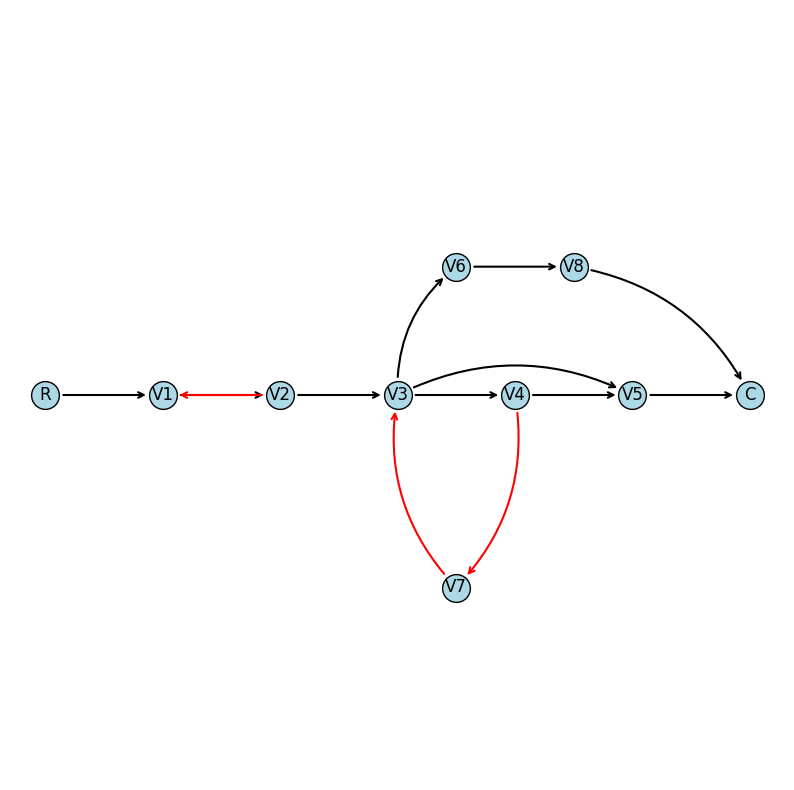

In [85]:
import matplotlib.pyplot as plt
from time import sleep
# from sistema import *

# Vai ser o len(matriz)
matriz = [
    #R  1  2  3  4  5  6  7  8  C
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # R
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # V1
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0], # v2 
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], # v3
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # v4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # v5
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # v6
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], # v7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # v8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # C
]

'''
    Variáveis importantes para serem importadas do código principal:
        matriz = Matriz de adjacência // Trocar matriz por self.matriz resolve
        caminhos_frente = Vetor dos caminhos à frente // trocar por __encontra_caminho()
        ganhos_lacos = Vetor dos laços // trocar por __encontra_lacos()
'''

# Guarda o indice do maior caminho a frente 
# Entrada: __encontra_caminho()
caminhos_frente = [[0, 1, 2, 3, 4, 5, 9], [0, 1, 2, 3, 6, 8, 9]]
# encontra o indice do maior comprimento
ignora = max(range(len(caminhos_frente)), key=lambda i: len(caminhos_frente[i]))
# encontra o tamanho do maior indice
max_len = len(caminhos_frente[ignora])
# conta a quantidade de caminhos de maior tamanho possuem
conta_caminhos = sum(1 for caminho in caminhos_frente if len(caminho) == max_len)

'''
    Como já tem as Keys no código principal, talvez não precise disso aqui
'''
# Cria os nós
nos = []
# Preenche os nós
for i in range(len(matriz)):
    # Nó R
    if i == 0:
        nos.append('R')
    # Nó C
    elif i == len(matriz) - 1:
        nos.append('C')
    # Nós V
    else:
        nos.append('V' + str(i))
#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em X -------------------------------------#
# Aplica os pesos em X
pesos_x = len(matriz)*[-1]
# [-1,- 1,- 1, ..., -1]

# Muda os valores se eles estiverem no caminho principal
for index, value in enumerate(caminhos_frente[ignora]):
    pesos_x[value] = index
# [0, 1, 2, 3, 4, 5, -1, -1, -1, 6]

# Para o caso de um segundo caminho a frente de mesmo tamanho com um indice
for index, value in enumerate(caminhos_frente):
    if index == ignora:
        continue
    
    dif = sorted(list(set(caminhos_frente[index]) - set(caminhos_frente[ignora])))
    if dif == list():
        continue
    
    for i, v in enumerate(value):

        if v == dif[0]:
            anterior = value[i-1]

        if v == dif[-1]:
            posterior = value[i+1]
    for i, d in enumerate(dif):
        if i == 0:
            pesos_x[d] = pesos_x[anterior] + 0.5
        else:
            dif_ant = dif[i-1]
            pesos_x[d] = pesos_x[dif_ant] + 1.0

# [[1, 2, 3, 4, 6, 1], [3, 4, 7, 3], [5, 9, 8, 5]]
# Vai ser os ganhos de laços
ganhos_lacos = [[3, 4, 7, 3]]
qnt_lacos = len(ganhos_lacos)

for index, value in enumerate(ganhos_lacos):
    dif = list(set(ganhos_lacos[index]) - set(caminhos_frente[ignora]))
    # primeiro = ganhos_lacos[index][0]
    primeiro = pesos_x[ganhos_lacos[index][0]]
    for ind, i in enumerate(value):
        if i == dif[0] or ind == len(value) - 1:
            continue
        ultimo = pesos_x[i]
    pesos_x[dif[0]] = (primeiro + ultimo) / 2 
#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em Y -------------------------------------#
# Preenche pesos_y
pesos_y = len(matriz)*[-1]
# Aplica os pesos em Y
for i in caminhos_frente[ignora]:
    pesos_y[i] = 0
# [0, 0, 0, 0, 0, -1, -1, -1, 0]

for index, value in enumerate(caminhos_frente):
    if index == ignora:
        continue
    
    dif = sorted(list(set(caminhos_frente[index]) - set(caminhos_frente[ignora])))
    
    if dif == list():
        continue    

    for i, d in enumerate(dif):
        pesos_y[d] = 0.5

c = 0.5
for index, value in enumerate(ganhos_lacos):
    dif = list(set(ganhos_lacos[index]) - set(caminhos_frente[ignora]))
    # primeiro = pesos_y[ganhos_lacos[index][0]]
    for ind, i in enumerate(value):
        if i == dif[0] or ind == len(value) - 1:
            continue
        c -= 1
        # ultimo = pesos_y[i]
    pesos_y[dif[0]] = c / 2
    c = 0.5
               
# Caminho do mesmo tamanho do maior, porém com outros indices
for index, value in enumerate(caminhos_frente):
    if index != ignora and len(caminhos_frente[index]) == max_len:
        dif = list(set(caminhos_frente[index]) - set(caminhos_frente[ignora]))
        if dif != None:
            for i in dif:
                pesos_y[i] == 1        
#------------------------------------------------------------------------------------#
#----------------------Cria o dicionário das posições--------------------------------#
pos = {}
for i in range(len(nos)):
    pos[nos[i]] = (pesos_x[i], pesos_y[i])
#------------------------------------------------------------------------------------#
#---------------------------Cria e plota os gráficos---------------------------------#


# Usuario escolhe o que vai ser mostrado:
# Se for uma realimentação escolhida
escolha = 1
transparencia = [1, 1]
# Se o usuário escolher mostrar uma realimentação:
# Fazer o usuário escolher qual vai ser a realimentação:
laco = 1 # Supondo a escolha do laço 1
caminho = 1 # Supondo a escolha do caminho 0

# [[0, 1, 2, 3, 5, 9], [0, 1, 2, 3, 4, 5, 9]]
def draw(vetor, valor):
    transparencia[0] = transparencia[0] / 5
    dep = vetor[valor]

    for index, value in enumerate(dep):
        # if index != len(dep) - 1:
        ax.scatter(pesos_x[value], pesos_y[value], s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[1])
        ax.text(pesos_x[value], pesos_y[value], nos[value], ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[1])

    for index, value in enumerate(dep):
        if index != len(dep) - 1:
            for i in range(len(matriz)):
                if i == value:    # [1, 2, 7, 1]
                    j = dep[index + 1]
                    # for j in range(len(matriz)):
                    if matriz[i][j] >= 1:
                        start = pos[nos[i]]
                        end = pos[nos[j]]
                        curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                        # Desenha de acordo com a leitura da matriz de adjacência superior
                        if j > i:
                            if i < len(matriz) - 2:
                                if start[0] <= end[0]:
                                    color='black' # Ligação para caminho a frente
                                else:
                                    color='red' # Ligação para realimentação
                                draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparencia
                        # Desenha de acordo com a leitura da matriz de adjacência inferior
                        if i > j:
                            if start[0] <= end[0]:
                                color='black' # Ligação para caminho a frente
                            else:
                                color='red' # Ligação para realimentação
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparência
    draw_graph()

# Chama todas as funções bases:
def draw_graph():
    draw_nodes()
    draw_connections()
#------------------------------------------------------------------------------------#
#---------------------------Cria e plota os gráficos---------------------------------#

# Criar a figura e remove os eixos
fig, ax = plt.subplots(figsize=(len(matriz), len(matriz)))
plt.ylim(min(pesos_y)*2, -min(pesos_y)*2) # Colocar o menor e maior peso para y
ax.set_axis_off()

def draw_arrow(ax, start, end, color='black', curvature=0, alpha=1): # Mudar a transparencia dependendo se vai ser mostrado algo ou não
        ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data',
                    arrowprops=dict(arrowstyle="->", lw=1.5, color=color, shrinkA=13, shrinkB=12, connectionstyle=f"arc3,rad={curvature}", alpha=alpha))

def draw_connections(): 
    # Desenha linhas entre os nós do caminho a frente
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            # Se houver uma única ligação
            if matriz[i][j] == 0:
                continue
            
            start = pos[nos[i]]
            end = pos[nos[j]]
            
            # print(nos, pos)
            # print(start, end)
            for k in range(matriz[i][j]):
                curvature = 0.0
                
                if k != 0 or abs(start[0] - end[0]) != 1:
                    curvature = -0.25 if abs(start[0] - end[0]) > 0 else 0  # Desenha as ligações para os nós de caminho a frente
                    if k > 1:
                        curvature = -0.25 * k

                # Percorre o triângulo superior
                if j > i:
                    if i < len(matriz) - 1:
                        if start[0] <= end[0]:
                            color='black' # Ligação para caminho a frente
                        else:
                            color='red' # Ligação para realimentação
                        draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[0]) # Colocar a transparencia
                # Percorre o triângulo inferior
                if i > j:
                    color='red' # Ligação para realimentação
                    draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[0]) # Colocar a transparência
    plt.show()

# Desenha os nós
def draw_nodes():
    for label, (x, y) in pos.items():
        ax.scatter(x, y, s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[0])  # Ponto do nó => O alpha define a
        ax.text(x, y, label, ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[0])  # Rótulo do nó

# laco = 2
# draw(caminhos_frente, 1)
# draw_laco(laco)
# draw_caminho_a_frente(caminho)
draw_graph()

In [ ]:
def draw_caminho_a_frente(caminho):
    transparencia[0] = transparencia[0] / 5
    dep = caminhos_frente[caminho]

    for index, value in enumerate(dep):
        ax.scatter(pesos_x[value], pesos_y[value], s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[1])
        ax.text(pesos_x[value], pesos_y[value], nos[value], ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[1])

    for index, value in enumerate(dep):
        if index != len(dep) - 1:
            for i in range(len(matriz)):
                if i == value:
                    j = dep[index + 1]
                    # for j in range(len(matriz)):
                        # Desenha de acordo com a leitura da matriz de adjacência superior
                    if matriz[i][j] >= 1: #and j > i:
                        start = pos[nos[i]]
                        end = pos[nos[j]]
                        curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                        if i < len(matriz) - 2:
                            if start[0] <= end[0]:
                                color='black' # Ligação para caminho a frente
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparencia
    draw_graph()


def draw_laco (laco):
    transparencia[0] = transparencia[0] / 5
    dep = ganhos_lacos[laco]

    for index, value in enumerate(dep):
        # if index != len(dep) - 1:
        ax.scatter(pesos_x[value], pesos_y[value], s=400, color='lightblue', edgecolor='black', zorder=1, alpha=transparencia[1])
        ax.text(pesos_x[value], pesos_y[value], nos[value], ha='center', va='center', fontsize=12, zorder=1, alpha=transparencia[1])

    for index, value in enumerate(dep):
        if index != len(dep) - 1:
            for i in range(len(matriz)):
                if i == value:    # [1, 2, 7, 1]
                    j = dep[index + 1]
                    # for j in range(len(matriz)):
                    if matriz[i][j] >= 1:
                        start = pos[nos[i]]
                        end = pos[nos[j]]
                        curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                        # Desenha de acordo com a leitura da matriz de adjacência superior
                        if j > i:
                            if i < len(matriz) - 2:
                                if start[0] <= end[0]:
                                    color='black' # Ligação para caminho a frente
                                else:
                                    color='red' # Ligação para realimentação
                                draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparencia
                        # Desenha de acordo com a leitura da matriz de adjacência inferior
                        if i > j:
                            if start[0] <= end[0]:
                                color='black' # Ligação para caminho a frente
                            else:
                                color='red' # Ligação para realimentação
                            draw_arrow(ax, start, end, color, curvature=curvature, alpha=transparencia[1]) # Colocar a transparência
    draw_graph()